In [1]:
# !wget -cO - 'https://docs.google.com/uc?export=download&id=1gOc05uq8GH8PlByjsr5HOC0-wzgKpKwu&confirm=t' > file.csv
# !wget -cO - 'https://docs.google.com/uc?export=download&id=1oqsiAaQfpy5u4tPrlSh8hVqmpw4xOuSj&confirm=t' > file.csv
!pip install dtreeviz
!wget -cO - 'https://docs.google.com/uc?export=download&id=1goOQlQfQ1IwD1hY-VzVHMOagb5DosNvl&confirm=t' > movieData.csv # use this
# !wget -cO - 'https://docs.google.com/uc?export=download&id=1ZJSeOhDLH9LhxFkzsEKRnMrZGIk2SJ9G&confirm=t' > file1940.csv # 1940 - 1949 data
# !wget -cO - 'https://docs.google.com/uc?export=download&id=1PMy412nAxI_vBpcM6CZq3MjEiJ3NTvyL&confirm=t' > file1980.csv # 1980 - 1989 data
# from google.colab import drive

# drive.mount('/content/gdrive')



--2022-04-22 14:18:28--  https://docs.google.com/uc?export=download&id=1goOQlQfQ1IwD1hY-VzVHMOagb5DosNvl&confirm=t
Resolving docs.google.com (docs.google.com)... 142.250.157.139, 142.250.157.102, 142.250.157.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8o9c9928fb3vg207kcf1bvu66cv9iip7/1650637050000/05611206898098812597/*/1goOQlQfQ1IwD1hY-VzVHMOagb5DosNvl?e=download [following]
--2022-04-22 14:18:28--  https://doc-0k-2s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8o9c9928fb3vg207kcf1bvu66cv9iip7/1650637050000/05611206898098812597/*/1goOQlQfQ1IwD1hY-VzVHMOagb5DosNvl?e=download
Resolving doc-0k-2s-docs.googleusercontent.com (doc-0k-2s-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0k-2s-docs.googleusercontent.com (doc-

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
import datetime as dt
from scipy import stats
import statistics
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
sb.set() # set the default Seaborn style for graphics

In [3]:
movieData = pd.read_csv('movieData.csv')
# movieData1940 = pd.read_csv('file1940.csv')
# movieData1980 = pd.read_csv('file1980.csv')


# frames = [movieData, movieData1940, movieData1980]

In [4]:
movieData


,adult,casts,video,videos,tagline,status,spoken_languages,runtime,production_companies,production_countries,...,original_title,overview,popularity,poster_path,release_date,release_dates,title,video.1,vote_average,vote_count
0,False,"['Sean Bean', 'Chris Hemsworth', 'Victoria Pro...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",NaN,Released,"['English', 'French']",108.0,"['Immortal Thoughts', 'Three Good Men']",['United States of America'],...,Ca$h,A stroke of good luck turns lethal for Sam Phe...,8.177,/nEeeKsfN1hr98aCmL16LVOckawC.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'US', 'release_dat...",Ca$h,False,5.9,181
1,False,"['Elizabeth Cervantes', 'Julio Bekhor', 'Marco...",False,{'results': []},Temptation has consequences,Released,['Spanish'],89.0,['Lionsgate'],['Mexico'],...,Oscura Seduccion,Laura is a successful plastic surgeon who feel...,8.935,/qrwUzLQhCn0SKNKX1Q4FIsVDnvL.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'MX', 'release_dat...",Oscura Seduccion,False,7.0,85
2,False,"['Shannon Beckner', 'Oded Fehr', 'Ryan Kennedy...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",NaN,Released,['English'],95.0,"['Stallion Media', 'Studio 407', 'TADORA Filmp...","['Germany', 'United States of America']",...,Super Hybrid,"Late one night, a mysterious car is brought in...",7.599,/iK3RR1bNWN99jt3EwEAqYanw6Br.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'FR', 'release_dat...",Super Hybrid,False,5.3,56
3,False,"['Dustin Milligan', 'Amanda Crew', 'Richard de...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",NaN,Released,"['English', 'Italian']",89.0,"['Rampart Films', 'Raven West Films', 'Resonan...",['Canada'],...,Repeaters,A gritty mind-bending thriller about three twe...,9.157,/9nQuL87o5AcUayeZM3cOXw1VbIv.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'US', 'release_dat...",Repeaters,False,5.8,136
4,False,"['Sam Voutas', 'Angela Tong']",False,{'results': []},Terror is coming home.,Released,['English'],85.0,[],[],...,Walking the Dead,His latest offering from serial horror movie d...,6.070,/oxSZHPbfwoMRLqXrwhgvmuqALtG.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'CA', 'release_dat...",Walking the Dead,False,6.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142926,False,"['Hamas Syahid', 'Aquino Umar', 'Masaji Wijaya...",False,{'results': []},NaN,Released,['Indonesian'],98.0,['Seru! Production'],['Indonesia'],...,Duka Sedalam Cinta,When Gagah had an accident near North Maluku h...,0.600,/9cO9SWw87vKNJEWhVTr04KdSB62.jpg,2017-10-19,"{'results': [{'iso_3166_1': 'ID', 'release_dat...",Duka Sedalam Cinta,False,0.0,0
142927,False,"['Christine Horn', 'Jonny Mars', 'Antoine McKa...",False,{'results': []},NaN,Released,['English'],87.0,[],[],...,Rogers Park,Two Chicago couples struggle to keep their lov...,0.600,/csDezKNQTZW7Q1gGtsEHkq7qHUj.jpg,2017-10-19,"{'results': [{'iso_3166_1': 'US', 'release_dat...",Rogers Park,False,5.3,3
142928,False,['Daniel Hope'],False,{'results': []},NaN,Released,['German'],0.0,[],['Germany'],...,Daniel Hope - Der Klang des Lebens,No overview found.,0.600,/cEmYIztVRpRyb4hhoFrwJrKvzZk.jpg,2017-10-19,"{'results': [{'iso_3166_1': 'CH', 'release_dat...",Daniel Hope - Der Klang des Lebens,False,0.0,0
142929,False,[],False,{'results': []},NaN,Released,['English'],85.0,[],['France'],...,"Lindy Lou, Juror Number 2",Documentary about the jurors in a murder trial...,0.600,/olJuzfW2NyfAFtRPFZ1vPuYKs9H.jpg,2017-10-19,"{'results': [{'iso_3166_1': 'FR', 'release_dat...","Lindy Lou, Juror Number 2",False,7.1,4


In [5]:
# Before deleting empty 
print("Data type : ", type(movieData))
print("Data dims : ", movieData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (142931, 27)


In [6]:
nan_value = float("NaN")
# movieData.replace("", nan_value, inplace=True)
movieData.dropna(subset = ["vote_average"], inplace=True)
print("Data dims : ", movieData.shape)

Data dims :  (142931, 27)


In [7]:
print(movieData.dtypes)

adult                      bool
casts                    object
video                      bool
videos                   object
tagline                  object
status                   object
spoken_languages         object
runtime                 float64
production_companies     object
production_countries     object
budget                    int64
revenue                   int64
backdrop_path            object
genre_ids                object
genres                   object
id                        int64
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
release_date             object
release_dates            object
title                    object
video.1                    bool
vote_average            float64
vote_count                int64
dtype: object


# Cleaning Data

In [8]:
#Fixing CODE

movieData.adult.replace({'True': True, 'False': False}, inplace=True)
movieData.video.replace({'True': True, 'False': False}, inplace=True)


movieData['adult'].replace('\ufeffadult', np.nan, inplace=True)
movieData.dropna(subset=['adult'], inplace=True)


# Converting data type
movieData['runtime'] = movieData.runtime.astype(str).astype(float)
movieData['budget'] = movieData.budget.astype(str).astype(float)
movieData['revenue'] = movieData.revenue.astype(str).astype(float)
movieData['id'] = movieData.id.astype(str).astype(int)
movieData['popularity'] = movieData.popularity.astype(float)
movieData['release_date'] = movieData.release_date.astype(str).astype('datetime64[ns]')
movieData['vote_average'] = movieData.vote_average.astype(str).astype(float)
movieData['vote_count'] = movieData.vote_count.astype(str).astype(float)



movieData.dtypes
# a = movieData['popularity'].unique()
# a.sort()
# a


adult                             bool
casts                           object
video                             bool
videos                          object
tagline                         object
status                          object
spoken_languages                object
runtime                        float64
production_companies            object
production_countries            object
budget                         float64
revenue                        float64
backdrop_path                   object
genre_ids                       object
genres                          object
id                               int64
original_language               object
original_title                  object
overview                        object
popularity                     float64
poster_path                     object
release_date            datetime64[ns]
release_dates                   object
title                           object
video.1                           bool
vote_average             

In [9]:
# Creating new variable to filter out 0 budget and 0 revenue

non_zero_movie = movieData.loc[movieData['revenue']*movieData['budget'] != 0]

non_zero_movie.shape

(2747, 27)

In [10]:
non_zero_movie

,adult,casts,video,videos,tagline,status,spoken_languages,runtime,production_companies,production_countries,...,original_title,overview,popularity,poster_path,release_date,release_dates,title,video.1,vote_average,vote_count
0,False,"['Sean Bean', 'Chris Hemsworth', 'Victoria Pro...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",NaN,Released,"['English', 'French']",108.0,"['Immortal Thoughts', 'Three Good Men']",['United States of America'],...,Ca$h,A stroke of good luck turns lethal for Sam Phe...,8.177,/nEeeKsfN1hr98aCmL16LVOckawC.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'US', 'release_dat...",Ca$h,False,5.9,181.0
7,False,"['Kakule Wilson', 'Sserunya Ernest', 'G. Puffs...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",EXPECT THE UNEXPECTABLE!,Released,"['English', 'Ganda']",64.0,"['Ramon Film Productions', 'Wakaliwood']",['Uganda'],...,Who Killed Captain Alex?,"Recognized as Uganda’s first action film, Who ...",6.837,/pbFJbm8a4KhB5kU18GU4ZpRnJFr.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'UG', 'release_dat...",Who Killed Captain Alex?,False,7.0,80.0
102,False,"['Mammootty', 'Sonu Gowda', 'Nedumudi Venu', '...",False,{'results': []},NaN,Released,['Malayalam'],155.0,[],[],...,ബെസ്റ്റ് ആക്ടര്‍,Best Actor is a movie about an ordinary school...,2.823,NaN,2010-01-01,"{'results': [{'iso_3166_1': 'IN', 'release_dat...",Best Actor,False,6.4,17.0
156,False,"['Amitabh Bachchan', 'Ritesh Deshmukh', 'Pares...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",Truth Is Terrible,Released,['Hindi'],145.0,"['Cinergy Pictures', 'Viacom 18 Motion Picture...",['India'],...,राण,The revered chief of a news agency tries to ma...,1.426,/j7gUDAxD5x1nxgRy34lTs8IOYWo.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'US', 'release_dat...",Rann,False,6.5,14.0
164,False,"['Glenn Berggoetz', 'Baird Lefter', 'Lauren vo...",False,"{'results': [{'iso_639_1': 'en', 'iso_3166_1':...",Nothin' an English Professor Can't Handle,Released,[],87.0,['Driving With Our Eyes Shut'],['United States of America'],...,To Die is Hard,When a gang of terrorists invade a campus buil...,2.278,/lnd4V9gaGW6T5ONDc60sS48qtmo.jpg,2010-01-01,"{'results': [{'iso_3166_1': 'US', 'release_dat...",To Die is Hard,False,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142721,False,[],False,{'results': []},Sentimental surroundings bring back our lost m...,Released,[],5.0,[],[],...,Sentimental Reminiscence,Shots and collections of familiar surroundings...,0.643,/29TofrAcFMRx5f5bAusQbX5xea7.jpg,2017-10-18,"{'results': [{'iso_3166_1': 'GB', 'release_dat...",Sentimental Reminiscence,False,0.0,0.0
142751,False,[],False,{'results': []},NaN,Released,[],0.0,[],[],...,"Refletir, Residir Em Si",NaN,0.600,/9YcPmLHPMzUn3FYoYuTqbPhOzxR.jpg,2017-10-18,"{'results': [{'iso_3166_1': 'BR', 'release_dat...","Refletir, Residir Em Si",False,0.0,0.0
142776,False,"['Baran Kosari', 'Reza Behboudi', 'Bahar Katou...",False,{'results': []},NaN,Released,['Persian'],93.0,['Iranian Independents'],['Iran'],...,شَنِل,The story narrates the story of the life of a ...,0.600,/wXlg0J9MePFNVWnyD8T1EUUadrE.jpg,2017-10-18,"{'results': [{'iso_3166_1': 'IR', 'release_dat...",Chanel,False,0.0,0.0
142801,False,"['Viktor Horinyak', 'Mila Syvatska', 'Ekaterin...",False,{'results': []},NaN,Released,['Russian'],120.0,"['The Walt Disney Company CIS', 'Walt Disney P...",['Russia'],...,Последний богатырь,Ivan is an ordinary guy who is transferred fro...,15.326,/ynMOyBo8xrWQiMvMJUhge4hVlse.jpg,2017-10-19,"{'results': [{'iso_3166_1': 'UA', 'release_dat...",The Last Warrior,False,7.1,114.0


# EDA


# Popularity vs Revenue

In [11]:
non_zero_movie_revenue_popularity = pd.DataFrame(non_zero_movie[['revenue','popularity']])
quater1 = non_zero_movie_revenue_popularity.quantile(0.25)
quater3 = non_zero_movie_revenue_popularity.quantile(0.75)
iqr = quater3-quater1

lower_bound = quater1 - (1.5 * iqr)
upper_bound = quater3 + (1.5 * iqr)

non_zero_movie_revenue_popularity_cleaned = non_zero_movie_revenue_popularity[~((non_zero_movie_revenue_popularity<lower_bound)|(non_zero_movie_revenue_popularity>upper_bound)).any(axis=1)]


              adult  video   runtime    budget   revenue        id  \
adult           NaN    NaN       NaN       NaN       NaN       NaN   
video           NaN    NaN       NaN       NaN       NaN       NaN   
runtime         NaN    NaN  1.000000  0.194771  0.166332 -0.337053   
budget          NaN    NaN  0.194771  1.000000  0.814149 -0.272580   
revenue         NaN    NaN  0.166332  0.814149  1.000000 -0.194923   
id              NaN    NaN -0.337053 -0.272580 -0.194923  1.000000   
popularity      NaN    NaN  0.158936  0.632858  0.651759 -0.265846   
video.1         NaN    NaN       NaN       NaN       NaN       NaN   
vote_average    NaN    NaN  0.320748  0.152278  0.167544 -0.266912   
vote_count      NaN    NaN  0.196889  0.693398  0.789933 -0.213230   

              popularity  video.1  vote_average  vote_count  
adult                NaN      NaN           NaN         NaN  
video                NaN      NaN           NaN         NaN  
runtime         0.158936      NaN      0.32

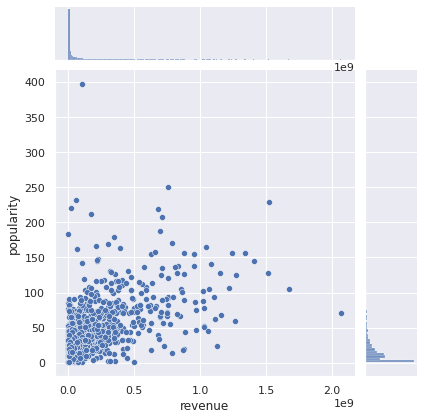

In [12]:
sb.jointplot(data=non_zero_movie,x='revenue',y='popularity')
print(non_zero_movie.corr())
print(non_zero_movie_revenue_popularity.corr())

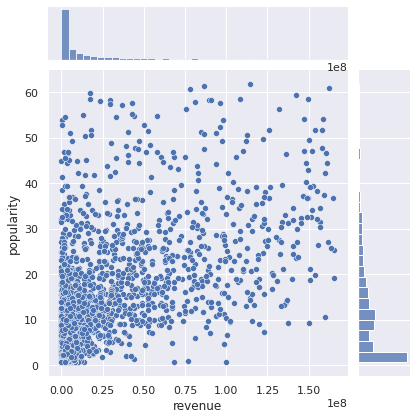

In [13]:
sb.jointplot(data=non_zero_movie_revenue_popularity_cleaned,x='revenue',y='popularity')

# Revenue vs Release Date

In [14]:
non_zero_movie_popularity_release_date = pd.DataFrame(non_zero_movie[['revenue','release_date']])
# non_zero_movie_revenue_release_date = pd.DataFrame(non_zero_movie[['revenue','release_date']])

q_low = non_zero_movie_popularity_release_date["revenue"].quantile(0.25)
q_hi  = non_zero_movie_popularity_release_date["revenue"].quantile(0.75)
q_iqr = q_hi-q_low

q_lower_bound = q_low - (1.5 * q_iqr)
q_upper_bound = q_hi + (1.5 * q_iqr)


df_filtered = non_zero_movie_popularity_release_date[((non_zero_movie_popularity_release_date["revenue"] < q_upper_bound) & (non_zero_movie_popularity_release_date["revenue"] > q_lower_bound))]

df_filtered['release_date'] = df_filtered['release_date'].dt.strftime('%m')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


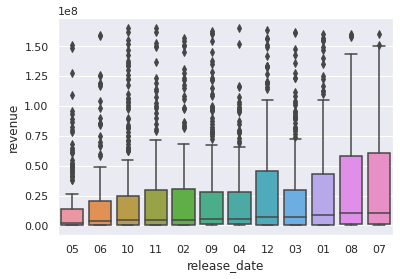

In [15]:
# Sorting boxplot by media, from small to big
sorted_index = df_filtered.groupby('release_date')['revenue'].median().sort_values().index.array

sb.boxplot(data=df_filtered,x='release_date',y='revenue',order=sorted_index)

# Casts vs Revenue


In [16]:
casts_popularity = pd.DataFrame(non_zero_movie[['casts','revenue','genres']])
print(casts_popularity.shape)
splitted_data ={}


for index,row in casts_popularity.iterrows():

  popularity_row=row[1]


  genres = [i.strip() for i in str(row[2]).replace("'","").replace('[','').replace(']','').split(',')]
  casts = [i.strip() for i in str(row[0]).replace("'","").replace('[','').replace(']','').split(',')]


  for j in casts:
    
    if j not in splitted_data:
      splitted_data[j]=[]
      splitted_data[j].append([popularity_row,genres])
      
    else:
      splitted_data[j].append([popularity_row,genres])





(2747, 3)


In [17]:
for i in splitted_data.keys():
  print(splitted_data[i])
  break

[[46488.0, ['Crime', 'Thriller', 'Comedy', 'Mystery']], [226497209.0, ['Adventure', 'Fantasy', 'Family']], [183018522.0, ['Adventure', 'Comedy', 'Family', 'Fantasy']], [52302796.0, ['Thriller', 'Horror', 'Mystery']], [183987723.0, ['Science Fiction', 'Fantasy', 'Action']], [244874809.0, ['Action', 'Comedy', 'Science Fiction']], [630161890.0, ['Drama', 'Adventure', 'Science Fiction']], [6490401.0, ['Drama', 'History']]]


In [18]:
def graph_topcasts(no_of_sucess_movie,no_of_casts):
  top_10_casts = []
  counter = 0

  # getting the top casts that has the highest median of at least x movies.
  # This is to prevent casts that has a one off sucess. Filtering to get consistent actors that has performed well 
  for i in splitted_data.keys():
    if len(splitted_data[i])>=no_of_sucess_movie:
      top_10_casts.append([i,statistics.median([i[0] for i in splitted_data[i]])])
    # print(statistics.median(splitted_data[i]))
    #test
    
  # print(top_10_casts)

  top_10_casts = sorted(top_10_casts, key=itemgetter(1))
  top_10_casts.reverse()
  # print(top_10_casts)
  top_10_casts_name = []
  top_10_casts_popularity = []
  top_10_casts_genres = []

  for i in range(no_of_casts):
    top_10_casts_name.append(top_10_casts[i][0])

    top_10_casts_popularity.append(list([p[0] for p in splitted_data[top_10_casts[i][0]]]))
    top_10_casts_genres.append(list([p[1] for p in splitted_data[top_10_casts[i][0]]]))

    

  # top_10_casts_dict


  temp = [list(i) for i in top_10_casts_popularity]
  temp2 = [list(i) for i in top_10_casts_genres]
 
  df_casts_popularity = pd.DataFrame({'cast':top_10_casts_name,'revenue':temp,'genres':temp2})
  df_casts_popularity = df_casts_popularity.explode('revenue')
  df_casts_popularity = df_casts_popularity.explode('genres')
  df_casts_popularity = df_casts_popularity.explode('genres')
  f = plt.figure(figsize=(25,8))
  sb.boxplot(data=df_casts_popularity,x='cast',y='revenue')
  return df_casts_popularity

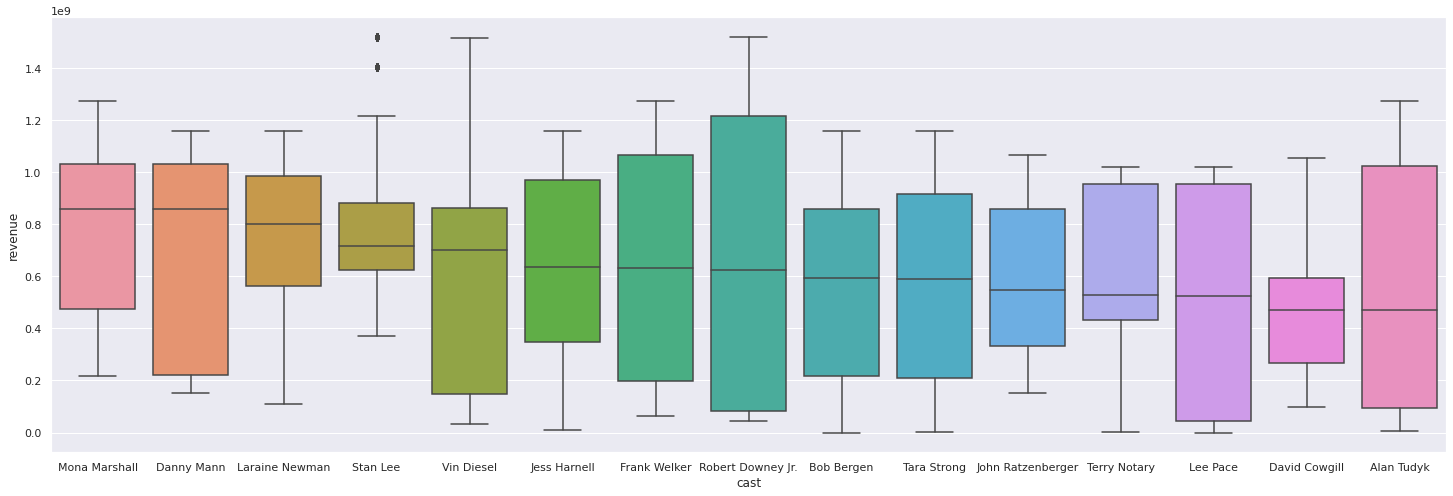

In [19]:
# highest median popularity >= 10 movies
a = graph_topcasts(10,15)

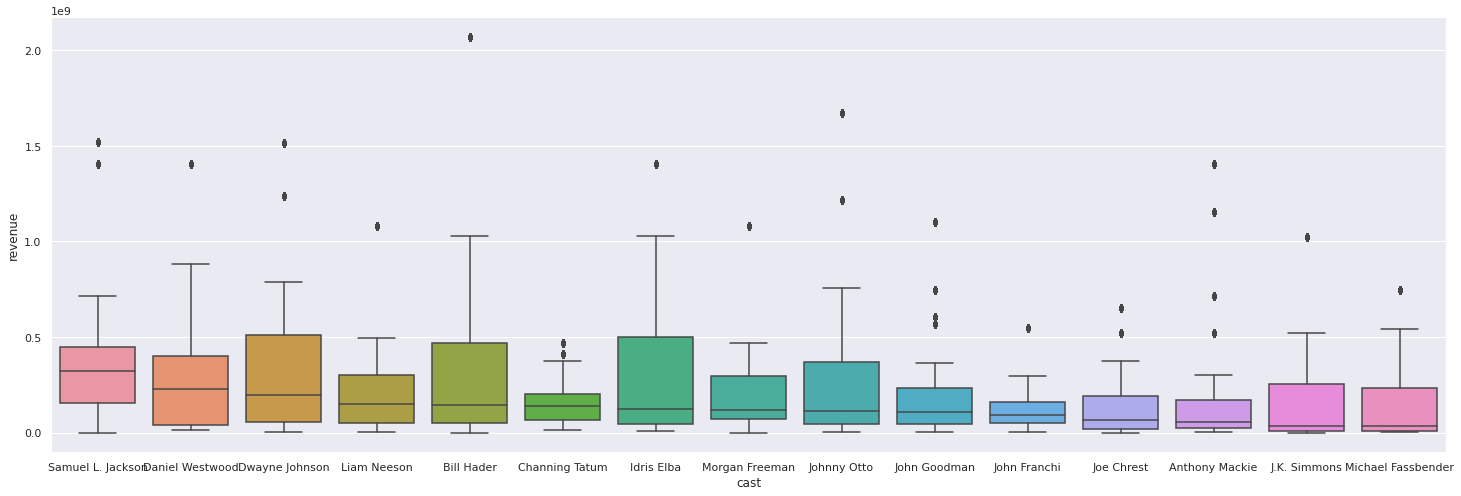

In [20]:
# highest median popularity >= 20 movies
a = graph_topcasts(20,15)

In [21]:
c = movieData.original_language.astype('category')
d = dict(enumerate(c.cat.categories))


In [22]:


new_cast_count = []
new_spoken_languages = []
new_runtime = []
new_production_companies = []
new_production_countries = []
new_budget = []
new_revenue = []
new_genres_count = []
new_original_lan = []
new_popularity = []

temp_movieData = pd.DataFrame(movieData)
temp_movieData['original_language'] = temp_movieData.original_language.astype('category').cat.codes

for index,row in temp_movieData.iterrows():

  new_cast_count.append(len([i.strip() for i in str(row[1]).replace("'","").replace('[','').replace(']','').split(',')]))
  new_spoken_languages.append(len([i.strip() for i in str(row[6]).replace("'","").replace('[','').replace(']','').split(',')]))
  new_runtime.append(float(row[7]))
  new_production_companies.append(len([i.strip() for i in str(row[8]).replace("'","").replace('[','').replace(']','').split(',')]))
  new_production_countries.append(len([i.strip() for i in str(row[9]).replace("'","").replace('[','').replace(']','').split(',')]))
  new_budget.append(row[10])
  new_revenue.append(row[11])
  new_genres_count.append(len([i.strip() for i in str(row[14]).replace("'","").replace('[','').replace(']','').split(',')]))
  new_original_lan.append(row[16])
  new_popularity.append(row[19])

df_model_data = pd.DataFrame({'spoken_languages': new_spoken_languages, 'runtime': new_runtime,
                              'cast_count': new_cast_count,
                              'spoken_languages': new_spoken_languages,
                              'runtime': new_runtime,
                              'production_companies': new_production_companies,
                              'production_countries': new_production_countries,
                              'budget': new_budget,
                              'revenue': new_revenue,
                              'genres_count': new_genres_count,
                              'original_lan': new_original_lan,
                              'popularity': new_popularity})




In [23]:
df_model_data.shape

(142931, 10)

In [24]:
df_model_data= df_model_data.dropna()

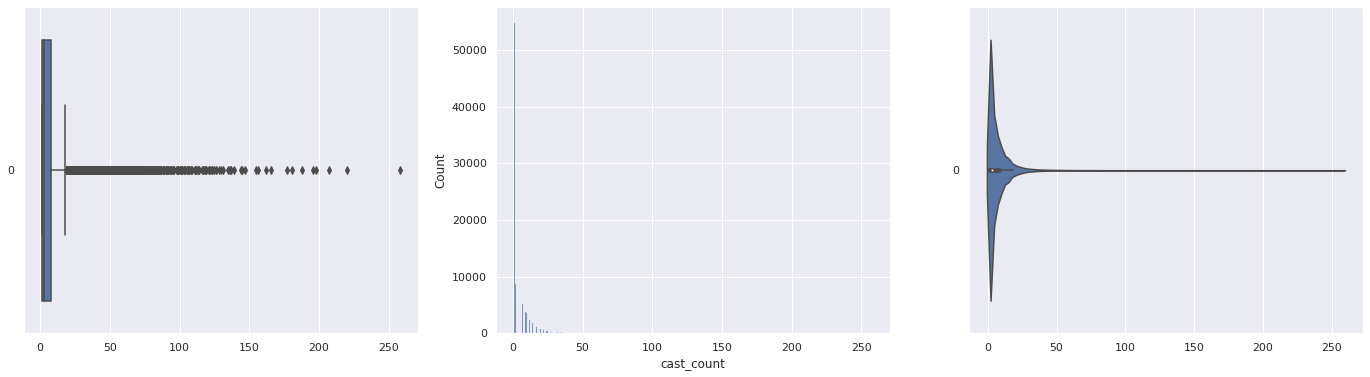

In [25]:

f, axes = plt.subplots(1, 3, figsize=(24, 6))


sb.boxplot(data = df_model_data['cast_count'], orient = "h", ax = axes[0])
sb.histplot(data = df_model_data['cast_count'], ax = axes[1])
sb.violinplot(data = df_model_data['cast_count'], orient = "h", ax = axes[2])

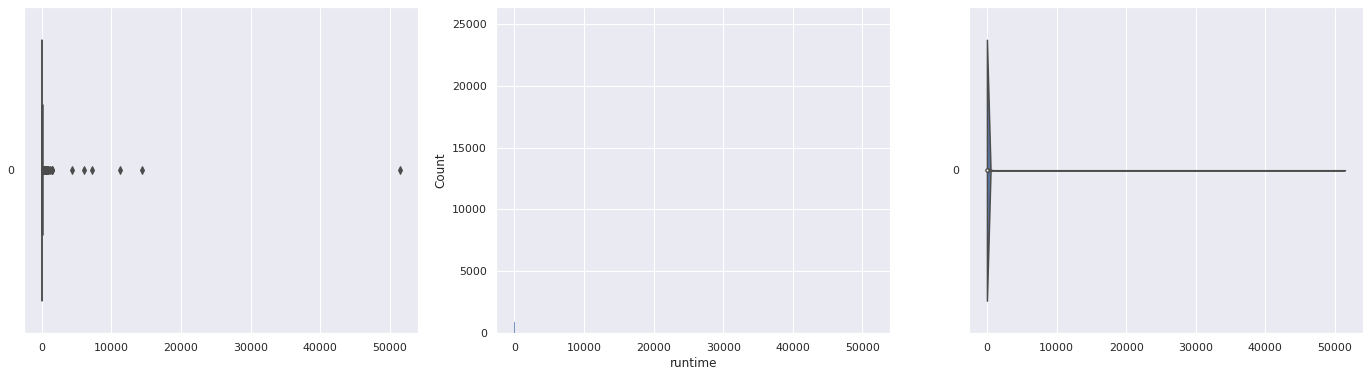

In [26]:

f, axes = plt.subplots(1, 3, figsize=(24, 6))


sb.boxplot(data = df_model_data['runtime'], orient = "h", ax = axes[0])
sb.histplot(data = df_model_data['runtime'], ax = axes[1])
sb.violinplot(data = df_model_data['runtime'], orient = "h", ax = axes[2])

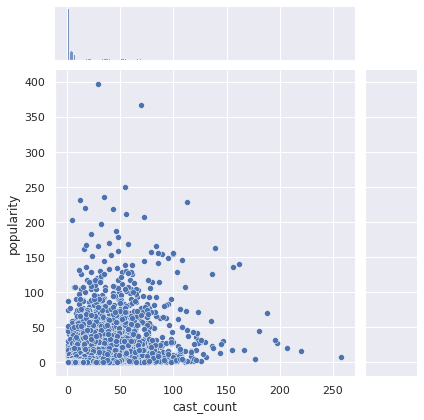

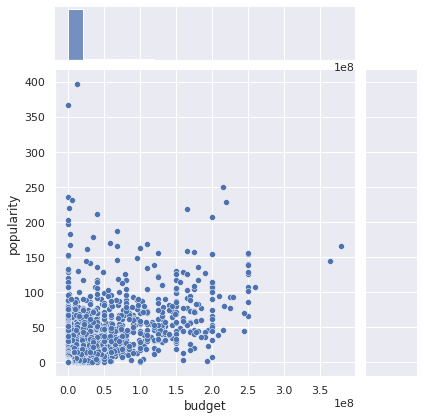

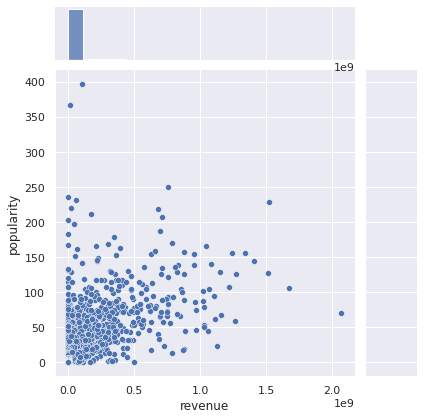

In [27]:
# f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.jointplot(data=df_model_data,x='cast_count',y='popularity')
sb.jointplot(data=df_model_data,x='budget',y='popularity')
sb.jointplot(data=df_model_data,x='revenue',y='popularity')


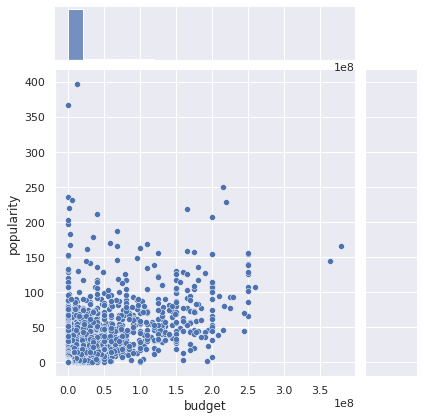

In [28]:
sb.jointplot(data=df_model_data,x='budget',y='popularity')


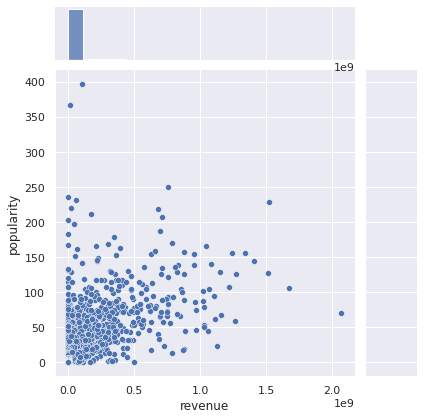

In [29]:
sb.jointplot(data=df_model_data,x='revenue',y='popularity')

# Random Forest Model

In [30]:
df_model_data.corr()

,spoken_languages,runtime,cast_count,production_companies,production_countries,budget,revenue,genres_count,original_lan,popularity
spoken_languages,1.000000,0.043365,0.138447,0.184855,0.232841,0.072156,0.052631,0.083459,0.018860,0.095867
runtime,0.043365,1.000000,0.108038,0.061665,0.035331,0.031050,0.023636,0.066634,0.008399,0.059549
cast_count,0.138447,0.108038,1.000000,0.360919,0.111240,0.363190,0.313730,0.319185,0.007262,0.438188
production_companies,0.184855,0.061665,0.360919,1.000000,0.294075,0.205482,0.146076,0.209235,-0.013981,0.317848
production_countries,0.232841,0.035331,0.111240,0.294075,1.000000,0.075894,0.045338,0.073840,-0.010154,0.098080
budget,0.072156,0.031050,0.363190,0.205482,0.075894,1.000000,0.826784,0.162359,-0.026342,0.603782
revenue,0.052631,0.023636,0.313730,0.146076,0.045338,0.826784,1.000000,0.124835,-0.020126,0.591857
genres_count,0.083459,0.066634,0.319185,0.209235,0.073840,0.162359,0.124835,1.000000,0.028500,0.256152
original_lan,0.018860,0.008399,0.007262,-0.013981,-0.010154,-0.026342,-0.020126,0.028500,1.000000,-0.049010
popularity,0.095867,0.059549,0.438188,0.317848,0.098080,0.603782,0.591857,0.256152,-0.049010,1.000000


In [31]:
df_model_data_non_zero = df_model_data.loc[df_model_data['revenue'] *df_model_data['budget'] != 0]
# df_model_data_non_zero = df_model_data.loc[df_model_data['budget'] != 0]
df_model_data_non_zero


,spoken_languages,runtime,cast_count,production_companies,production_countries,budget,revenue,genres_count,original_lan,popularity
0,2,108.0,12,2,1,7000000.0,46488.0,4,27,8.177
7,2,64.0,7,2,1,200.0,200.0,1,27,6.837
102,1,155.0,20,1,1,700000.0,3890000.0,2,76,2.823
156,1,145.0,11,3,1,7500000.0,2000000.0,2,44,1.426
164,1,87.0,13,1,1,1500.0,4549.0,2,27,2.278
...,...,...,...,...,...,...,...,...,...,...
142721,1,5.0,1,1,1,10000.0,10000.0,1,27,0.643
142751,1,0.0,1,1,1,100.0,100.0,1,96,0.600
142776,1,93.0,3,1,1,100000.0,2000000.0,1,32,0.600
142801,1,120.0,30,2,1,8250000.0,30060061.0,5,99,15.326


In [32]:
df_model_data_non_zero.corr()

,spoken_languages,runtime,cast_count,production_companies,production_countries,budget,revenue,genres_count,original_lan,popularity
spoken_languages,1.000000,0.159961,0.110371,0.172245,0.230611,0.084101,0.066898,0.113410,-0.003277,0.052675
runtime,0.159961,1.000000,0.266800,0.131630,0.068029,0.194771,0.166332,0.184069,0.167472,0.158936
cast_count,0.110371,0.266800,1.000000,0.289936,0.115494,0.491118,0.455976,0.168527,-0.215069,0.431480
production_companies,0.172245,0.131630,0.289936,1.000000,0.463406,0.178870,0.099566,0.151346,-0.236667,0.232304
production_countries,0.230611,0.068029,0.115494,0.463406,1.000000,0.113074,0.036241,0.105204,-0.130779,0.081035
budget,0.084101,0.194771,0.491118,0.178870,0.113074,1.000000,0.814049,0.352270,-0.218683,0.632479
revenue,0.066898,0.166332,0.455976,0.099566,0.036241,0.814049,1.000000,0.281657,-0.160039,0.651543
genres_count,0.113410,0.184069,0.168527,0.151346,0.105204,0.352270,0.281657,1.000000,-0.061116,0.279254
original_lan,-0.003277,0.167472,-0.215069,-0.236667,-0.130779,-0.218683,-0.160039,-0.061116,1.000000,-0.252106
popularity,0.052675,0.158936,0.431480,0.232304,0.081035,0.632479,0.651543,0.279254,-0.252106,1.000000


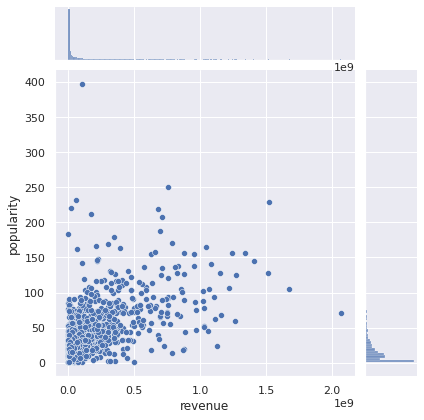

In [33]:
sb.jointplot(data=df_model_data_non_zero,x='revenue',y='popularity')

In [34]:
# X = df_model_data.drop(['popularity','revenue'],axis=1)
# y = df_model_data['popularity']

X = df_model_data_non_zero.drop(['popularity','revenue'],axis=1)
y = df_model_data_non_zero['revenue']

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [35]:
X_train_full

,spoken_languages,runtime,cast_count,production_companies,production_countries,budget,genres_count,original_lan
22345,1,112.0,73,5,1,52000000.0,1,27
34820,2,93.0,12,1,1,5000000.0,2,27
6994,3,109.0,36,5,1,117000000.0,2,27
101240,2,132.0,108,3,2,15000000.0,2,54
114737,1,102.0,10,1,1,165000.0,2,27
...,...,...,...,...,...,...,...,...
33531,1,99.0,31,4,1,6000000.0,2,99
36579,1,93.0,11,4,1,12000000.0,2,27
79442,2,120.0,6,1,1,722083.0,2,128
135179,1,155.0,91,7,2,217000000.0,4,27


In [36]:
y_train

22345      75450437.0
34820       4709246.0
6994      261989769.0
101240      6940000.0
114737      2350000.0
             ...     
33531       4588176.0
36579      32726956.0
79442        499168.0
135179    605425157.0
142275     10051659.0
Name: revenue, Length: 2192, dtype: float64

In [37]:
from sklearn.ensemble import RandomForestRegressor # ML
from sklearn.metrics import mean_absolute_error
from sklearn import tree

rf_model = RandomForestRegressor(random_state=1,max_depth=3)
# Fitting the model 
rf_model.fit(X_train_full, y_train)

RandomForestRegressor(max_depth=3, random_state=1)

In [38]:
# Prediction
y_train_pred_rf = rf_model.predict(X_train_full)
y_test_pred_rf = rf_model.predict(X_valid_full)

In [39]:
rf_model.estimators_[0].tree_.max_depth

3

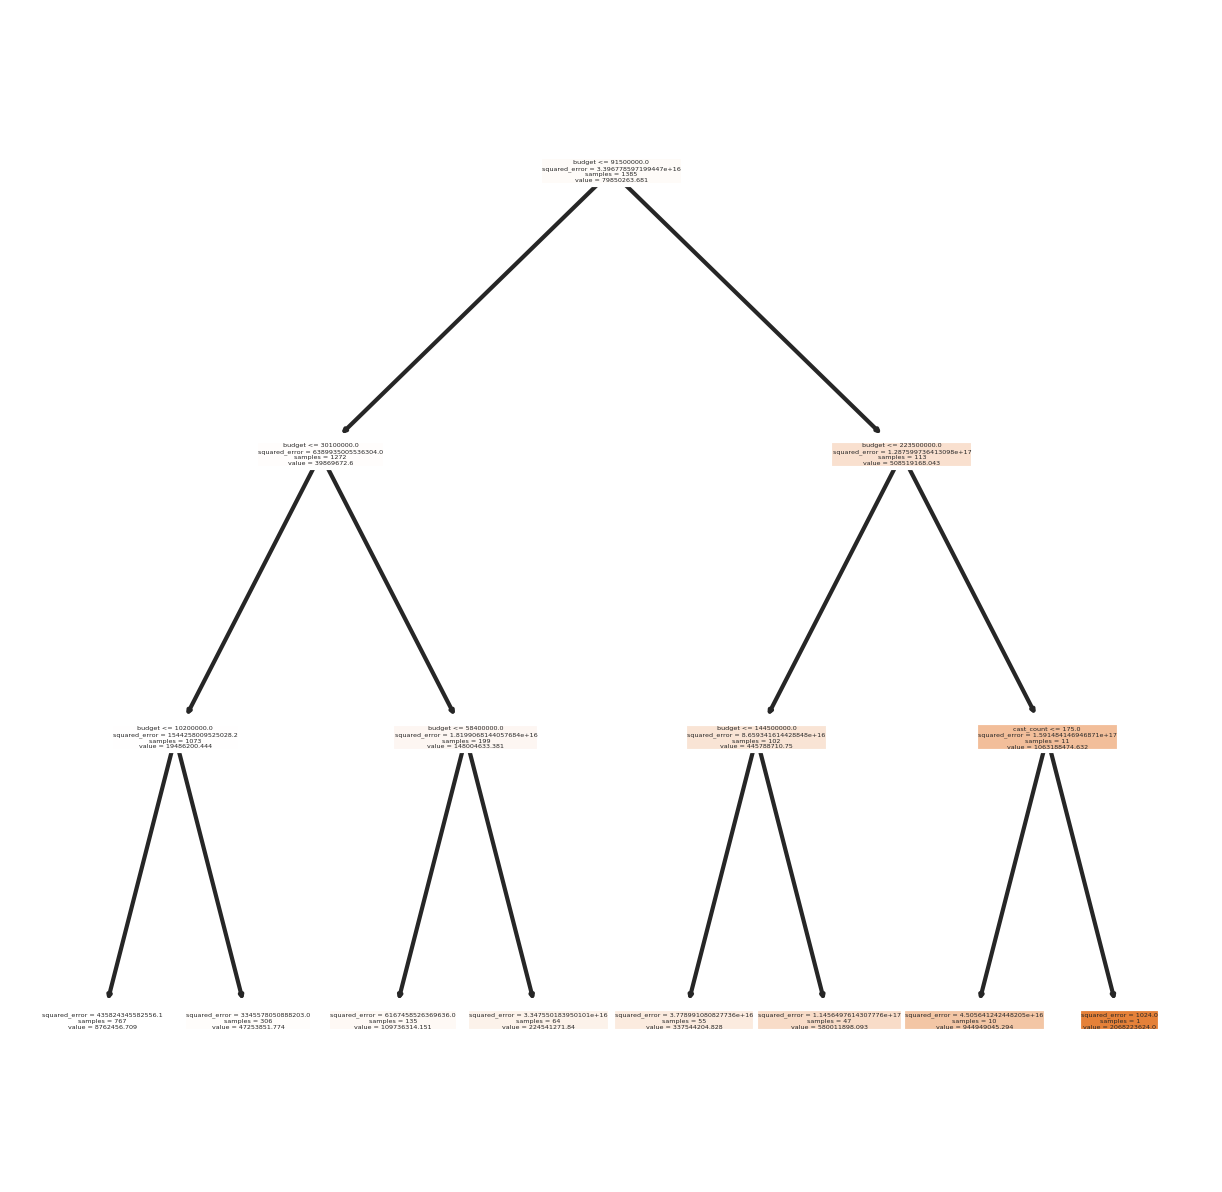

In [40]:
plt.figure(figsize=(5,5),dpi=300)
_ = tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True)


In [41]:


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_model.score(X_train_full, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_model.score(X_valid_full, y_valid))
print()
# Calculate MAE 

train_mae_rf = mean_absolute_error(y_train,y_train_pred_rf)
train_mse_rf = mean_squared_error(y_train,y_train_pred_rf)

test_mae_rf = mean_absolute_error(y_valid,y_test_pred_rf)
test_mse_rf = mean_squared_error(y_valid,y_test_pred_rf)

print("Train:")
print("Mean Absolute Error RF:" , train_mae_rf)
print("Mean Squared Error RF:" , train_mse_rf)
print("Test:")
print("Mean Absolute Error RF:" , test_mae_rf)
print("Mean Squared Error RF:" , test_mse_rf)
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.732305803077318

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.671513912883028

Train:
Mean Absolute Error RF: 42470990.49861637
Mean Squared Error RF: 8681890087269049.0
Test:
Mean Absolute Error RF: 48001017.75256448
Mean Squared Error RF: 1.002131413600009e+16



# Linear Regression

In [42]:
# df_model_data_non_zero
X = df_model_data_non_zero.drop(['popularity','revenue'],axis=1)
y = df_model_data_non_zero['revenue']

In [43]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

Intercept of Regression 	: b =  -9343130.347158909
Coefficients of Regression 	: a =  [ 4.55438000e+06 -5.08712453e+04  6.85738366e+05 -3.86226341e+06
 -5.38869293e+06  3.22134043e+00 -5.75598757e+05  1.05479568e+05]



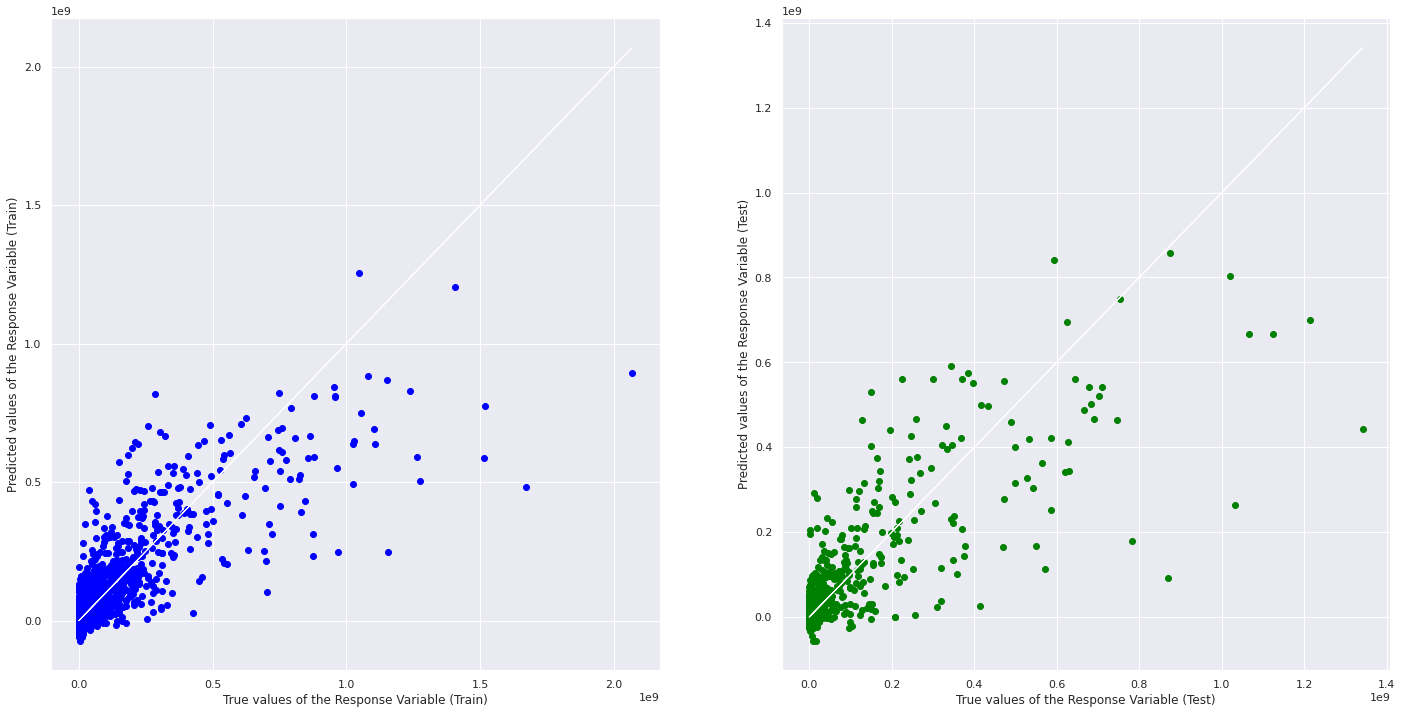

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6812699775902168
Mean Squared Error (MSE) 	: 1.0278841612413638e+16
Mean Absolute Error (MAE) 	: 47468302.99361773

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6428577403165994
Mean Squared Error (MSE) 	: 1.1220475493148472e+16
Mean Absolute Error (MAE) 	: 53529297.03458535



In [44]:
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
# print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
# print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error (MAE) \t:" , mean_absolute_error(y_train, y_train_pred))

print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE) \t:" , mean_absolute_error(y_test, y_test_pred))


print()

# XGBoost

In [45]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [46]:
# df_model_data_non_zero
X = df_model_data_non_zero.drop(['popularity','revenue'],axis=1)
y = df_model_data_non_zero['revenue']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [47]:
# Prediction
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [48]:
# Calculate MAE 

print("Train Dataset")
print("Classification Accuracy \t:", xgb_model.score(X_train, y_train))

print("Test Dataset")
print("Classification Accuracy \t:", xgb_model.score(X_test, y_test))

print()
print("Train:")
print("Mean Absolute Error XGBOOST:" , mean_absolute_error(y_train_pred_xgb, y_train))
print("Mean Squared Error XGBOOST:" , mean_squared_error(y_train_pred_xgb, y_train))
print("Test:")
print("Mean Absolute Error XGBOOST:" , mean_absolute_error(y_test_pred_xgb, y_test))
print("Mean Squared Error XGBOOST:" , mean_squared_error(y_test_pred_xgb, y_test))

Train Dataset
Classification Accuracy 	: 0.8401298027331733
Test Dataset
Classification Accuracy 	: 0.6229584675625994

Train:
Mean Absolute Error XGBOOST: 34282021.82294708
Mean Squared Error XGBOOST: 5155712737152546.0
Test:
Mean Absolute Error XGBOOST: 48389736.03120438
Mean Squared Error XGBOOST: 1.1845658585358464e+16


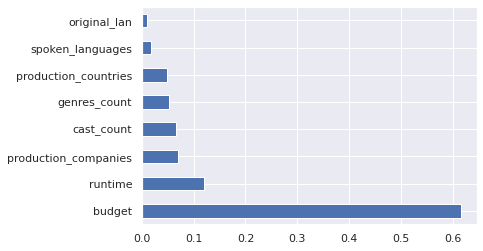

In [49]:
# Calculating feature importance for the XGBoost Model
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Genres

## Genre based on Year

In [50]:
def genre_dict_generator(time_range, visualization=False):
  genres_n_revenue = pd.DataFrame(non_zero_movie[["genres", "release_date", "revenue"]])
  q_low = genres_n_revenue["revenue"].quantile(0.25)
  q_hi  = genres_n_revenue["revenue"].quantile(0.75)
  q_iqr = q_hi-q_low
  q_lower_bound = q_low - (1.5 * q_iqr)
  q_upper_bound = q_hi + (1.5 * q_iqr)
  df_filtered = genres_n_revenue[((genres_n_revenue["revenue"] < q_upper_bound) & (genres_n_revenue["revenue"] > q_lower_bound))]

  genre_dataframe = {"genres":[],"revenue":[]}

  list_of_replace_char = ["[","]","'"," "]
  genres_dict = data_cleaning(genres_n_revenue, time_range, list_of_replace_char)

  print(genres_dict)
  # Data Sorting
  for key, genres_popularity in genres_dict.items():
    genre_dataframe["genres"] = []
    genre_dataframe["revenue"] = []
    for g, num in genres_popularity.items():
      if(g not in genre_dataframe["genres"]):
        genre_dataframe["genres"].append(g)
      genre_dataframe["revenue"].append(num)

    if visualization:
      visual(genre_dataframe, key)
  
  return genres_dict

def data_cleaning(dataframe, time_range, list_of_replace_char):
  genres_dict = {}
  for data in dataframe.itertuples():
    key = get_key(time_range, data.release_date)
    genres = string_replace(list_of_replace_char,data.genres).split(",")
    if key not in genres_dict:
      genres_dict[key] = {}

    for genre in genres:
      # Ignores empty genres
      if genre != "":
        # Adds genres into dictionary
        if genre not in genres_dict[key]:
          genres_dict[key][genre] = data.revenue
        else:
          genres_dict[key][genre] += data.revenue
  return genres_dict

def visual(data,key):
  # fig, axes = plt.subplots(2,4, figsize=(12,3))
  genre_df = pd.DataFrame(data=data).sort_values(by="revenue")
  genre_df.plot.barh(y="revenue", x="genres",title=f"Number of movie genres in {key}")
  plt.show()


def get_key(time_range, date_time):
  if time_range.lower() == "month":
    key = date_time.strftime("%b")
  elif time_range.lower() == "day":
    key = date_time.strftime("%A")
  else:
    key = date_time.year

  return key

def string_replace(list_of_replace_char, string_to_replace):
  for char in list_of_replace_char:
    string_to_replace = string_to_replace.replace(char, "")
  return string_to_replace

def bar_chart(dictionary, time_range, limit=3):
  top_genres = {}
  index = []

  for key, genres in dictionary.items():
    index.append(key)
    sorted_genres = dict(sorted(genres.items(), key=lambda x:x[1], reverse=True))
    for genre, revenue in sorted_genres.items():
      if genre in top_genres:
        top_genres[genre].append(revenue)
      elif len(top_genres) != limit: # Limit number of genres
        top_genres[genre] = [revenue]

  df = pd.DataFrame(data=top_genres, index=index)
  df.plot.bar(rot=0, title=f"Top Movie Genres over the {time_range}s", figsize=(10,10))

{2010: {'Crime': 1583509889.0, 'Thriller': 3715684795.0, 'Comedy': 8693194562.0, 'Mystery': 1435146957.0, 'Action': 8037033119.0, 'Family': 7699081569.0, 'Drama': 6580134968.0, 'Adventure': 11318837314.0, 'Romance': 3874514142.0, 'ScienceFiction': 3005905144.0, 'Horror': 1575085516.0, 'Fantasy': 7468056711.0, 'Documentary': 132591069.0, 'War': 281581699.0, 'Music': 151634033.0, 'Animation': 4684321256.0, 'History': 597033039.0, 'Western': 273903496.0, 'TVMovie': 1309580.0}, 2011: {'Comedy': 9519180150.0, 'Action': 9706946744.0, 'Adventure': 10702068197.0, 'Animation': 4486021955.0, 'Family': 5331765951.0, 'Documentary': 211249726.0, 'War': 301132366.0, 'Fantasy': 5493404684.0, 'Thriller': 5894432341.0, 'Drama': 5955288929.0, 'Romance': 3396672743.0, 'Crime': 2375502579.0, 'Horror': 1020786846.0, 'Mystery': 2364041498.0, 'Music': 719223398.0, 'ScienceFiction': 4744995394.0, 'Western': 420546928.0, 'History': 445164938.0, 'TVMovie': 15.0}, 2012: {'Family': 4491898815.0, 'Animation': 4089

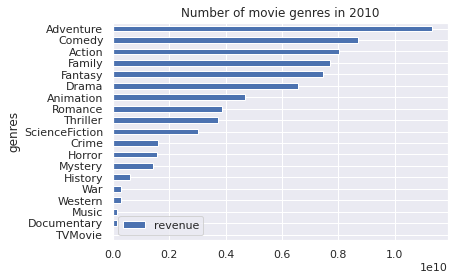

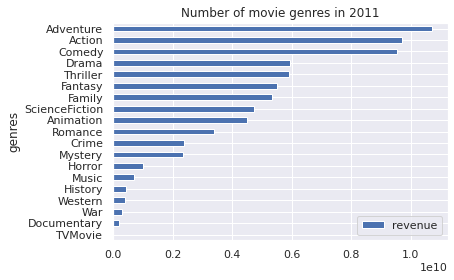

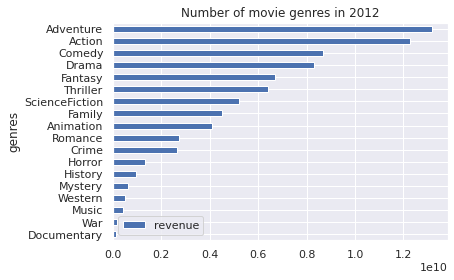

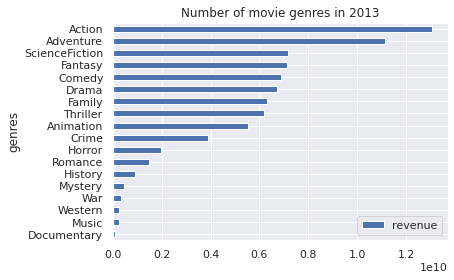

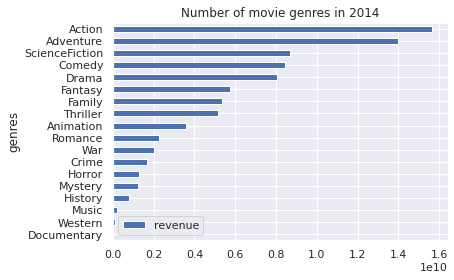

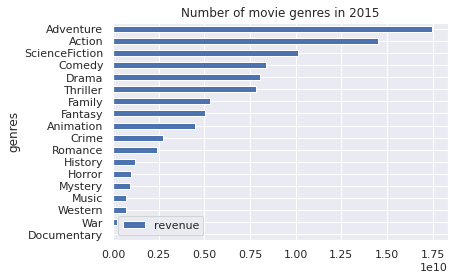

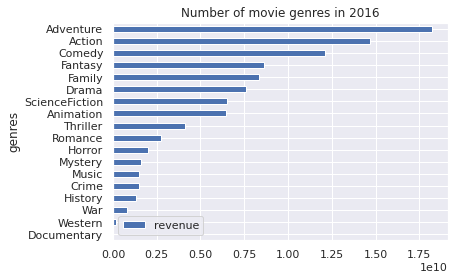

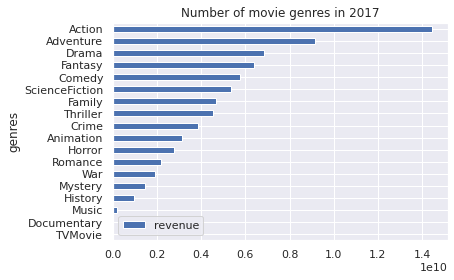

In [51]:
genres_dict = genre_dict_generator("year", True)

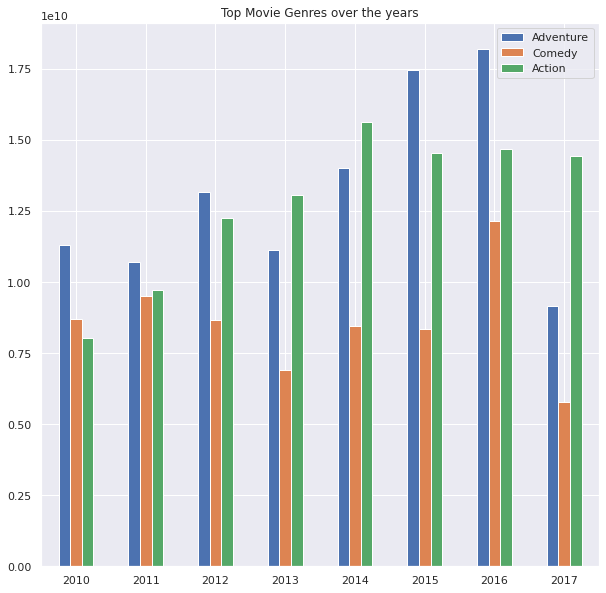

In [52]:
bar_chart(genres_dict, "year")

## Genres based on Month

In [53]:
month_genres_dict = genre_dict_generator("month")

{'Jan': {'Crime': 1355039494.0, 'Thriller': 2130910548.0, 'Comedy': 3829904493.0, 'Mystery': 661381783.0, 'Action': 4833786087.0, 'Family': 2096128421.0, 'Drama': 2432053836.0, 'Adventure': 3326682793.0, 'Romance': 677801971.0, 'ScienceFiction': 1072478378.0, 'Horror': 1783146894.0, 'Fantasy': 1556631636.0, 'Documentary': 1413677.0, 'Animation': 1643968637.0, 'War': 293817021.0, 'History': 615795585.0, 'TVMovie': 2775228.0, 'Music': 6000.0}, 'Feb': {'Adventure': 4019595887.0, 'Fantasy': 2286302017.0, 'Family': 2751750569.0, 'Drama': 4061367531.0, 'Crime': 859493146.0, 'Action': 4477210045.0, 'Thriller': 3486438905.0, 'Romance': 3332277578.0, 'War': 222131155.0, 'Music': 101237742.0, 'Comedy': 5449838902.0, 'Mystery': 1179790795.0, 'Animation': 2239282138.0, 'Horror': 700943542.0, 'Documentary': 121347360.0, 'ScienceFiction': 1577592777.0, 'History': 365409690.0}, 'Mar': {'Family': 7630624186.0, 'Fantasy': 8349830331.0, 'Adventure': 9864600932.0, 'Crime': 1085803243.0, 'Drama': 33168043

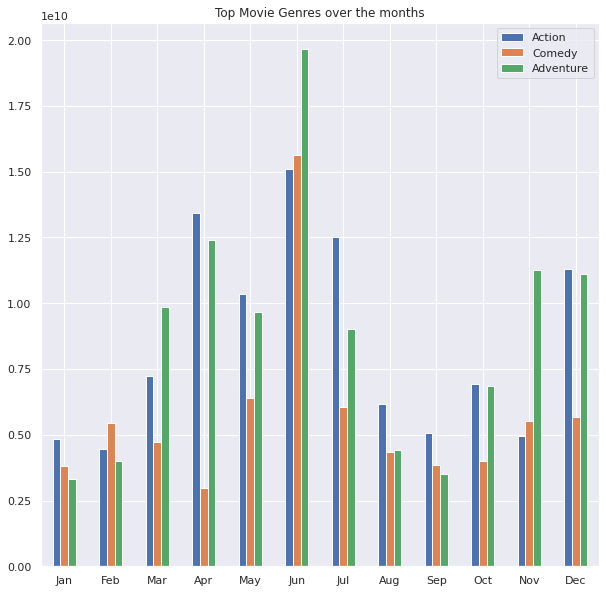

In [54]:
bar_chart(month_genres_dict, "month")

## Genres based on Day

In [55]:
day_genres_dict = genre_dict_generator("day")

{'Friday': {'Crime': 2709257668.0, 'Thriller': 4568577623.0, 'Comedy': 13948592138.0, 'Mystery': 1754040545.0, 'Action': 10144641358.0, 'Family': 5064488287.0, 'Drama': 12621110127.0, 'Adventure': 9532332775.0, 'Romance': 4459042631.0, 'Horror': 3038269676.0, 'Fantasy': 4798282738.0, 'Music': 618488005.0, 'ScienceFiction': 4234955889.0, 'Documentary': 381470735.0, 'Western': 874305539.0, 'Animation': 4117683541.0, 'History': 2459878164.0, 'War': 1089024469.0, 'TVMovie': 1033113.0}, 'Monday': {'Action': 3763240967.0, 'Thriller': 2533185193.0, 'ScienceFiction': 1044729053.0, 'Adventure': 3933124105.0, 'Fantasy': 3113162550.0, 'Family': 1087238655.0, 'Drama': 1798630206.0, 'Crime': 1443667877.0, 'Comedy': 2357105581.0, 'Horror': 208104909.0, 'Romance': 780207927.0, 'History': 267330318.0, 'Mystery': 557730194.0, 'TVMovie': 15.0, 'Documentary': 181145.0, 'Music': 50274394.0, 'Animation': 1110093597.0, 'War': 100001.0}, 'Wednesday': {'Horror': 3653207124.0, 'Mystery': 4255193577.0, 'Thrille

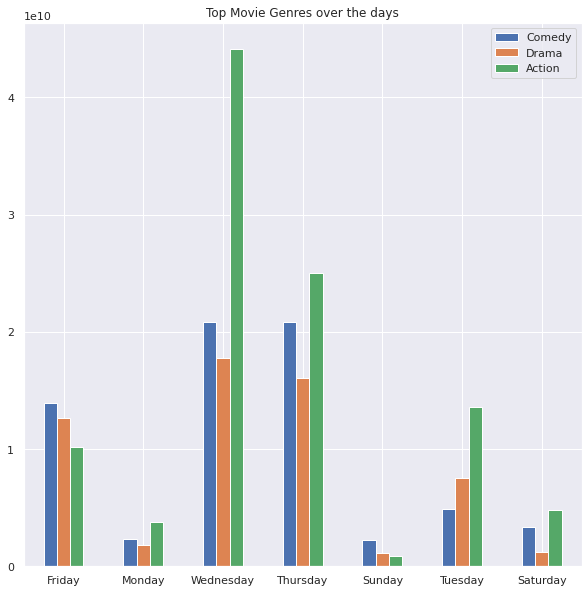

In [56]:
bar_chart(day_genres_dict, "day")

## Genre vs Revenue

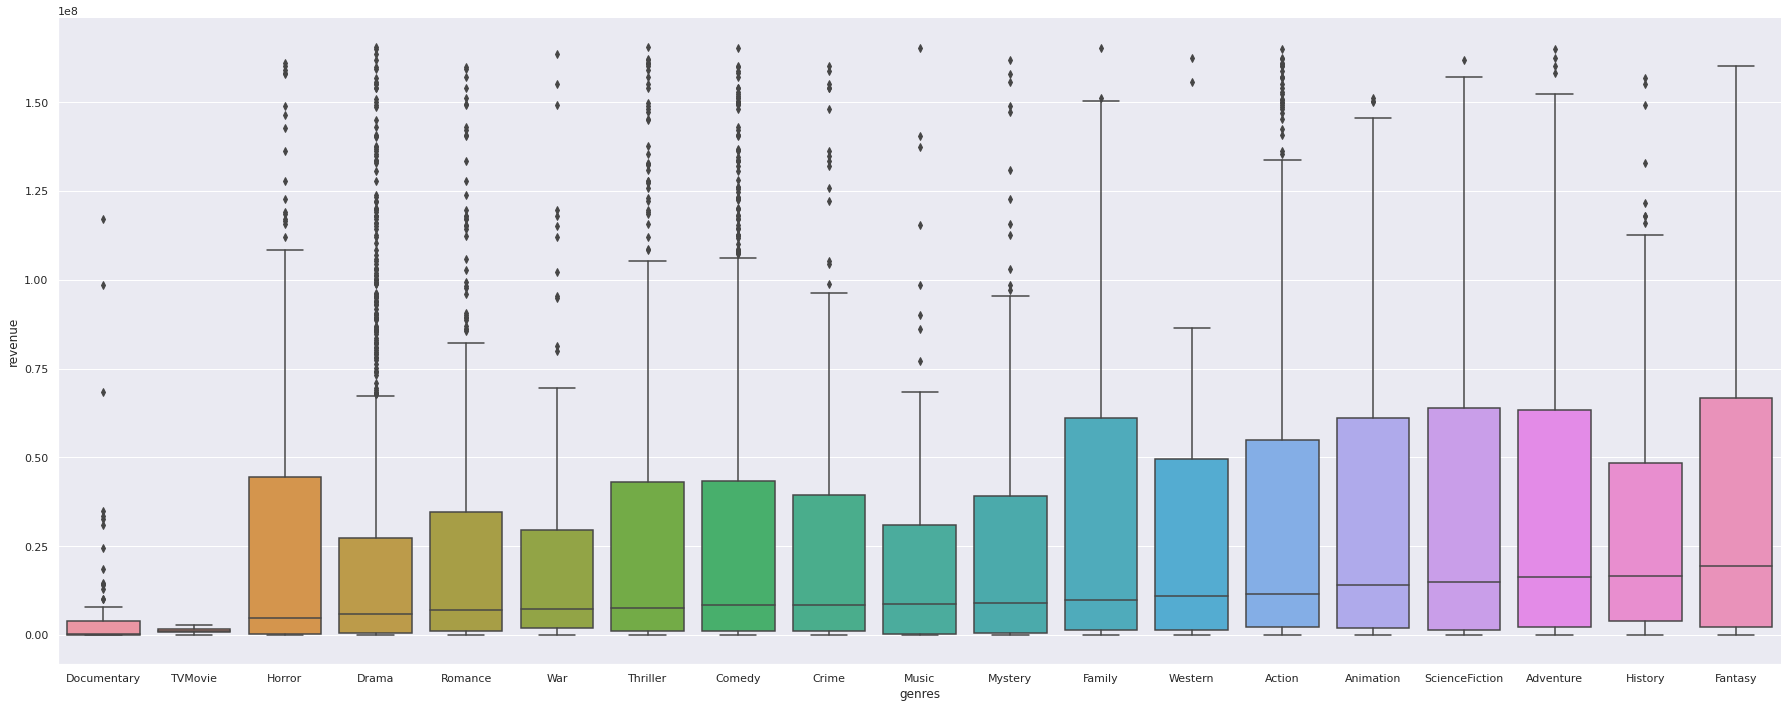

In [57]:
def data_rev_cleaning(dataframe, output, list_of_replace_char):
  for data in dataframe.itertuples():
    genres = string_replace(list_of_replace_char, data.genres).split(",")
    revenue = data.revenue
    for genre in genres:
      # Ignores empty genres
      if genre != "" and revenue > 0:
        # Adds genres into dictionary
        output["genres"].append(genre)
        output["revenue"].append(revenue)

# Filtering
genres_n_revenue = pd.DataFrame(non_zero_movie[["genres", "revenue"]])
q_low = genres_n_revenue["revenue"].quantile(0.25)
q_hi  = genres_n_revenue["revenue"].quantile(0.75)
q_iqr = q_hi-q_low
q_lower_bound = q_low - (1.5 * q_iqr)
q_upper_bound = q_hi + (1.5 * q_iqr)
df_filtered = genres_n_revenue[((genres_n_revenue["revenue"] < q_upper_bound) & (genres_n_revenue["revenue"] > q_lower_bound))]

gen_rev_dataframe = {"genres":[],"revenue":[]}

list_of_replace_char = ["[","]","'"," "]
data_rev_cleaning(df_filtered, gen_rev_dataframe,list_of_replace_char)

# print(pd.DataFrame(gen_rev_dataframe))
sorted_index = pd.DataFrame(gen_rev_dataframe).groupby("genres")["revenue"].median().sort_values().index.array

# sb.boxplot(data=pd.DataFrame(gen_rev_dataframe),x='genres',y='popularity',order=sorted_index)
sb.catplot(data=pd.DataFrame(gen_rev_dataframe), x="genres", y="revenue", height=10, aspect=2.5, kind="box", order=sorted_index)

# Runtime vs Popularity

In [58]:
# temp test
runtime_popularity_data = pd.DataFrame(non_zero_movie[['popularity','runtime']])

qrp_low = runtime_popularity_data["popularity"].quantile(0.25)
qrp_hi  = runtime_popularity_data["popularity"].quantile(0.75)
qrp_iqr = qrp_hi-qrp_low


qrp_lower_bound = qrp_low - (1.5 * qrp_iqr)
qrp_upper_bound = qrp_hi + (1.5 * qrp_iqr)


df_filtered_runtime_popularity = runtime_popularity_data[((runtime_popularity_data["popularity"] < qrp_upper_bound) & (runtime_popularity_data["popularity"] > qrp_lower_bound))]

# removing outliers


In [59]:
df_filtered_runtime_popularity.corr()

,popularity,runtime
popularity,1.000000,0.146492
runtime,0.146492,1.000000


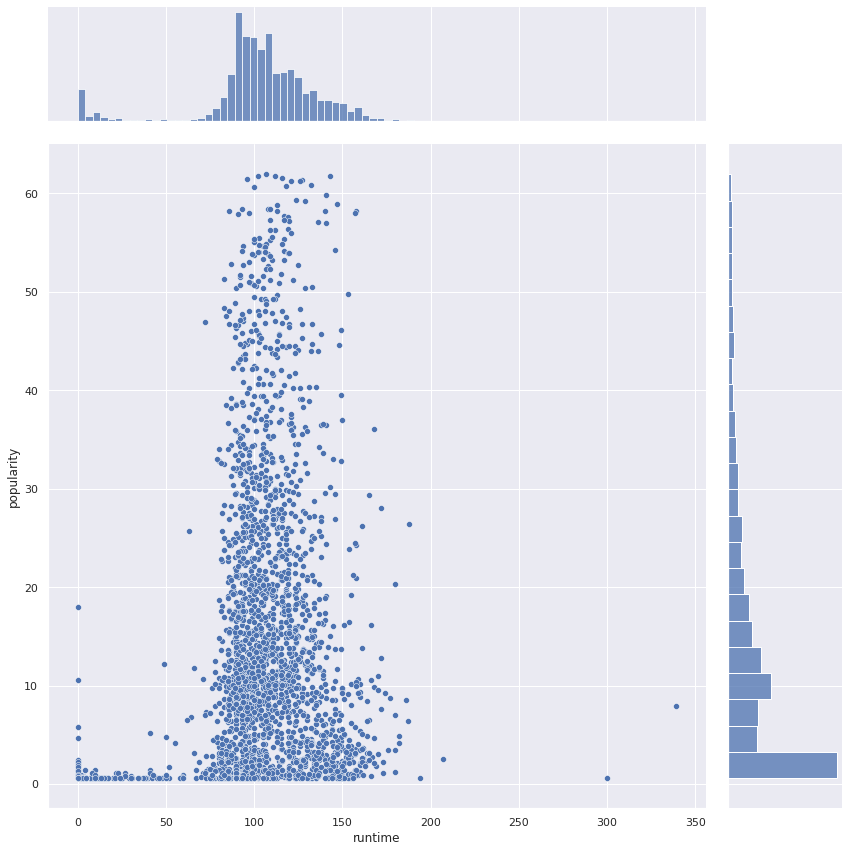

In [60]:
sb.jointplot(data = df_filtered_runtime_popularity, x = "runtime", y = "popularity", height = 12)

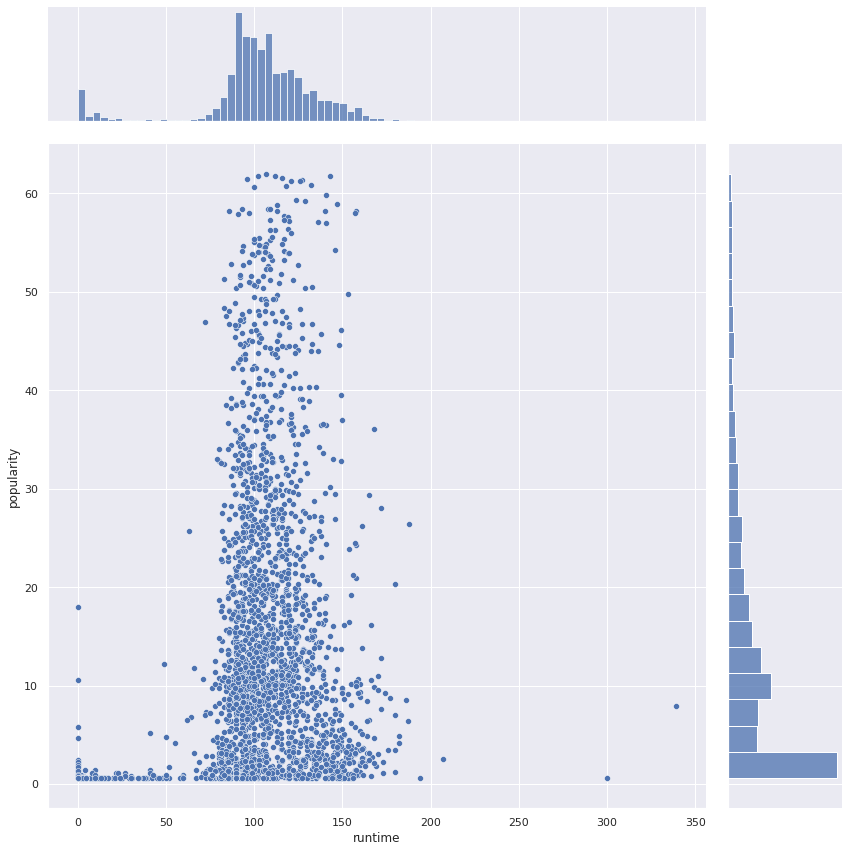

In [61]:
# removed outliers
sb.jointplot(data = df_filtered_runtime_popularity, x = df_filtered_runtime_popularity["runtime"], y = "popularity", height = 12)

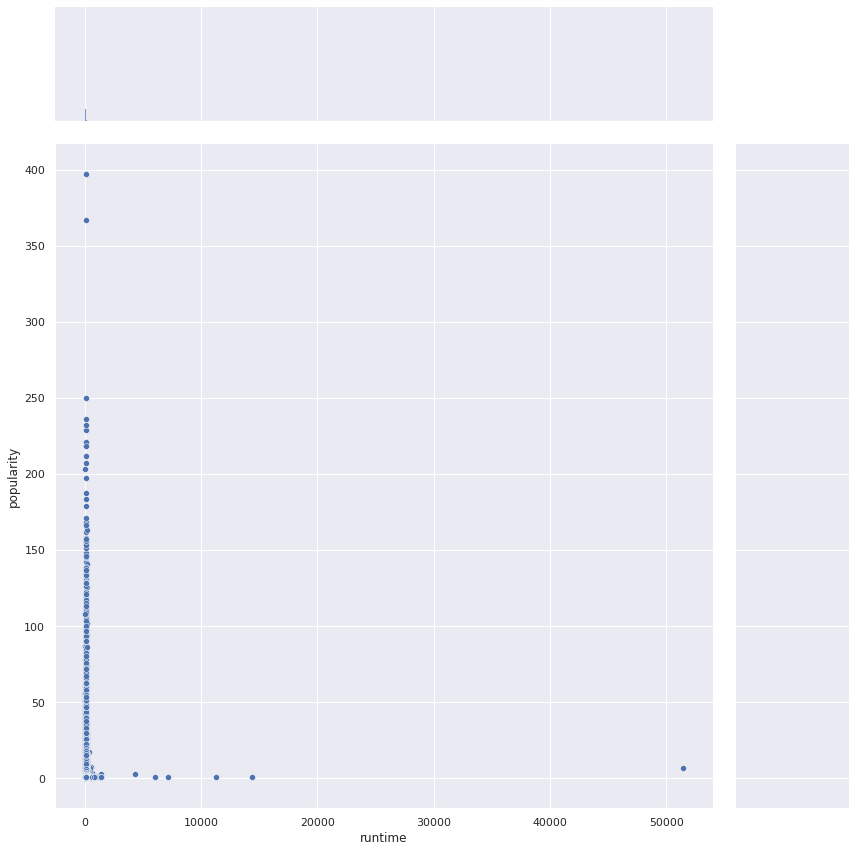

In [62]:
sb.jointplot(data = movieData, x = movieData["runtime"], y = "popularity", height = 12)

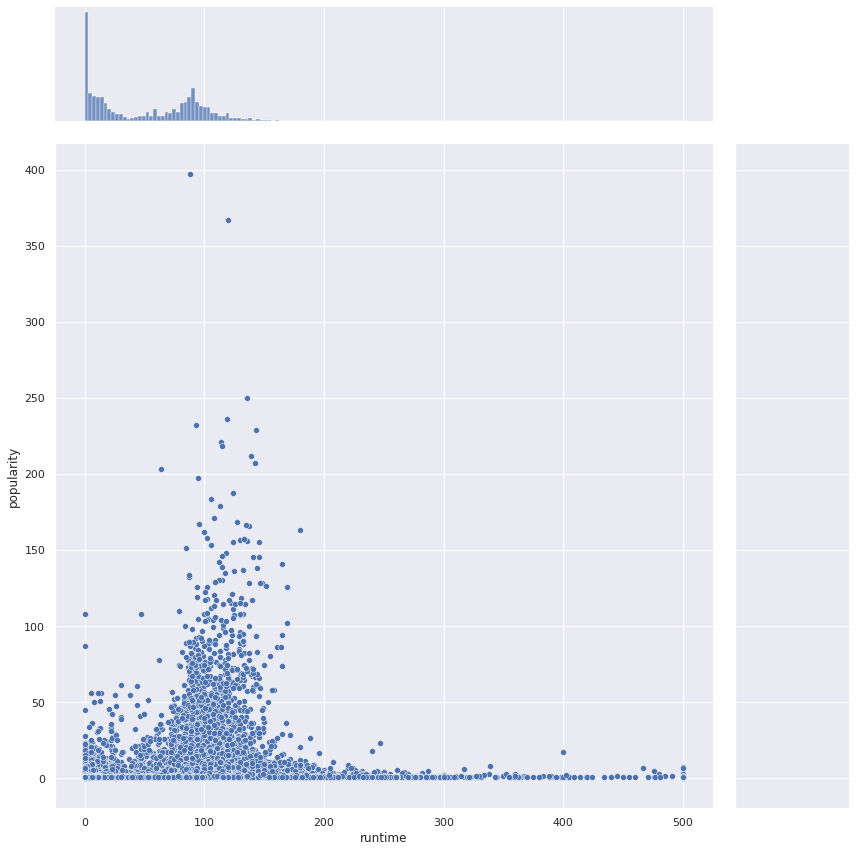

In [63]:
sb.jointplot(data = movieData, x = movieData["runtime"].clip(upper = 500), y = "popularity", height = 12)

In [64]:
runtime = movieData['runtime'].clip(upper = 500)
popularity = movieData['popularity']
jointDF = pd.concat([runtime, popularity], axis = 1) 
jointDF.corr()

,runtime,popularity
runtime,1.000000,0.195202
popularity,0.195202,1.000000


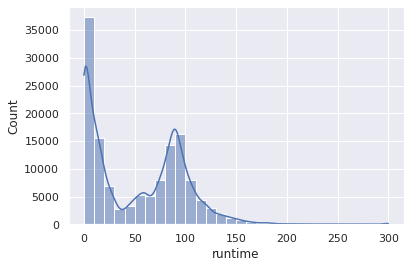

In [65]:
sb.histplot(movieData, x = movieData["runtime"].clip(upper = 300), binwidth = 10, kde=True)#, hue = "popularity")#, y = "popularity", binwidth = 50)

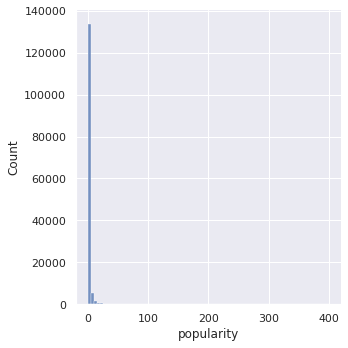

In [66]:
sb.displot(movieData, x = "popularity", binwidth = 5)

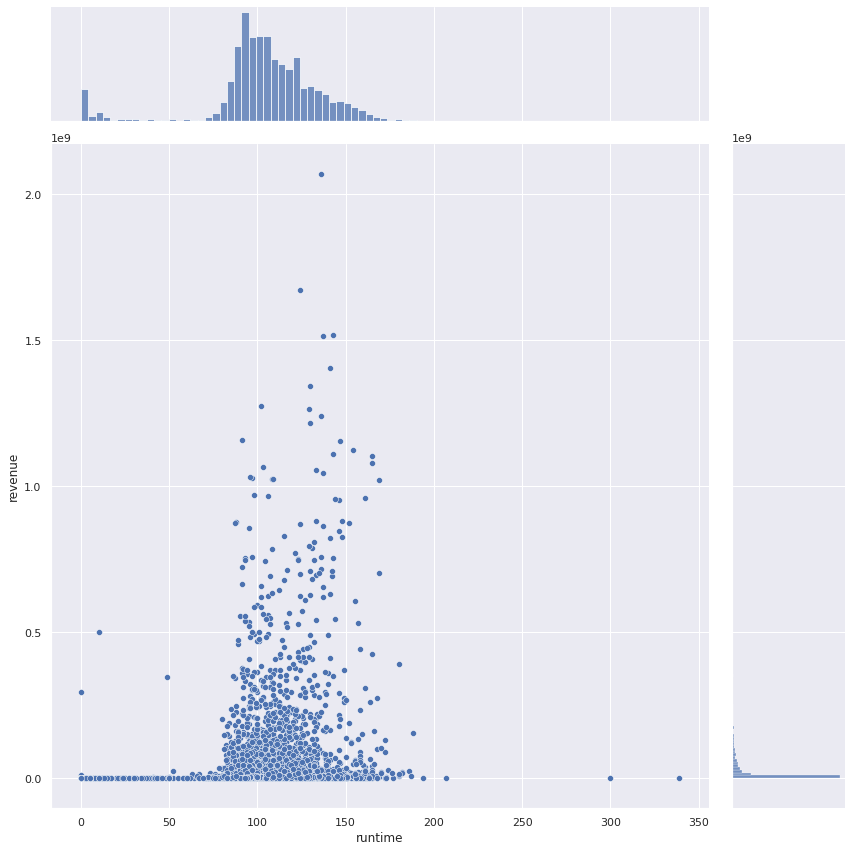

In [67]:
#runtime vs revenue (non zero)
sb.jointplot(data = non_zero_movie, x = non_zero_movie["runtime"].clip(upper = 500), y = "revenue", height = 12)

In [68]:
runtime = movieData['runtime'].clip(upper = 500)
revenue = movieData['revenue']
jointDF = pd.concat([runtime, revenue], axis = 1) 
jointDF.corr()

,runtime,revenue
runtime,1.000000,0.080335
revenue,0.080335,1.000000
